# Import packages and creation of DataFrames

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import pytz
from datetime import time

In [30]:
from running.run import Run

# df -> granularity by minute of each run
df = Run().get_total_runs()

# df_agg -> granularity by run
df_agg = Run().get_agg_runs()

In [31]:
df

,id,date,time,speed,pace,distance,cum_distance,km,total_km,note,period
0,be50d8c6-d47e-47fe-b803-3ca93974df46,2024-06-11,00:00,6.196269,5.379831,0.042800,0.042800,0.0,5.0,vila velha,Afternoon
1,be50d8c6-d47e-47fe-b803-3ca93974df46,2024-06-11,01:00,10.504468,5.716923,0.193611,0.236411,0.0,5.0,vila velha,Afternoon
2,be50d8c6-d47e-47fe-b803-3ca93974df46,2024-06-11,02:00,10.942200,5.484316,0.171488,0.407898,0.0,5.0,vila velha,Afternoon
3,be50d8c6-d47e-47fe-b803-3ca93974df46,2024-06-11,03:00,11.244522,5.339699,0.202122,0.610020,0.0,5.0,vila velha,Afternoon
4,be50d8c6-d47e-47fe-b803-3ca93974df46,2024-06-11,04:00,11.713714,5.122347,0.188908,0.798928,0.0,5.0,vila velha,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
25,56971639-e537-4c01-a8a7-604a8bc43746,2024-06-19,25:00,11.043818,5.439458,0.183769,4.449435,4.0,5.0,None,Morning
26,56971639-e537-4c01-a8a7-604a8bc43746,2024-06-19,26:00,11.631600,5.160323,0.182617,4.632052,4.0,5.0,None,Morning
27,56971639-e537-4c01-a8a7-604a8bc43746,2024-06-19,27:00,10.229400,5.869819,0.165906,4.797958,4.0,5.0,None,Morning
28,56971639-e537-4c01-a8a7-604a8bc43746,2024-06-19,28:00,10.591200,5.668505,0.179921,4.977879,4.0,5.0,None,Morning


In [32]:
# Colors

PURPLE = "#A361F2"
ORANGE = "#F59762"
GRAY = "#515151"
GREEN = '#919B81'
BLUE = '#789CF0'
BROWN = '#635B4F'
LIGHT_GREEN = '#42E36F'

# Exploratory Analysis

## Speed and Pace over time

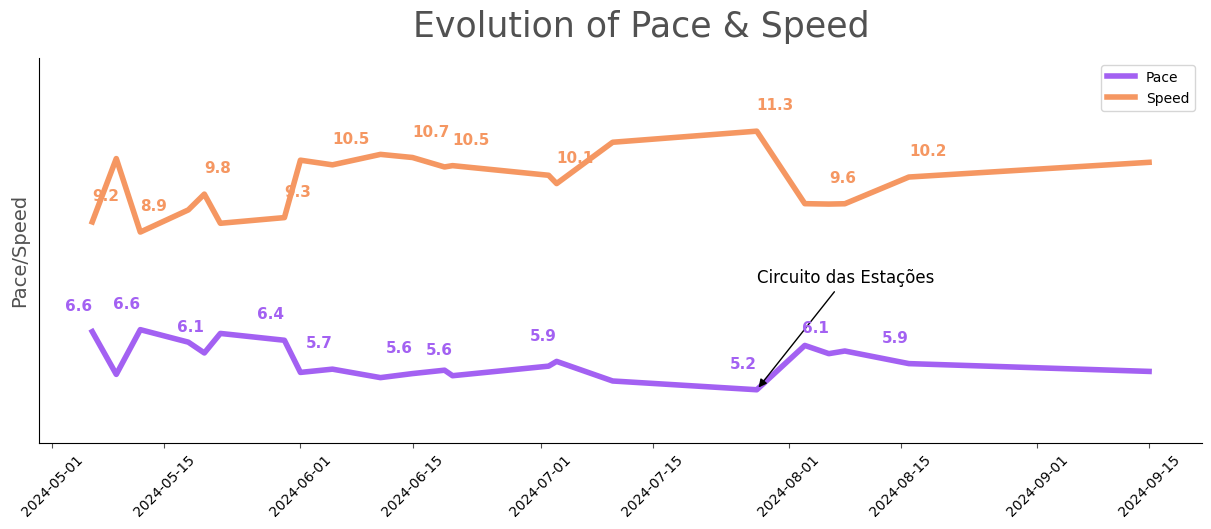

In [55]:
fig, ax = plt.subplots(figsize = (15, 5))

ax.plot(df_agg['date'], df_agg['pace'], color=PURPLE, linewidth=4, label='Pace')
ax.plot(df_agg['date'], df_agg['speed'], color=ORANGE, linewidth=4, label='Speed')

index = df_agg[df_agg['date'] == '2024-07-28'].index[0]

x = df_agg['date'][index]
y = df_agg['pace'][index]

ax.spines[['right', 'top']].set_visible(False)

ax.set_yticks([])
ax.set_ylabel('Pace/Speed', fontsize=14, color=GRAY)
ax.tick_params(axis='y', labelsize=12, color=GRAY)
ax.tick_params(axis='x', rotation=45, color=GRAY)
ax.set_ylim(4, 13)

ax.annotate(
    'Circuito das Estações', 
    xy=(x, y),
    xytext=(x, y + 2.5),
    arrowprops=dict(facecolor='black', arrowstyle='-|>'),  # Estilo da seta
    fontsize=12,
    color='black'
)

for i in range(0, len(df_agg), 2):
    ax.text(
        df_agg['date'][i], df_agg['pace'][i] + 0.5, f'{df_agg["pace"][i]:.1f}', fontsize=11, fontweight='bold', color=PURPLE, ha='right'
    )
    ax.text(
        df_agg['date'][i], df_agg['speed'][i] + 0.5, f'{df_agg["speed"][i]:.1f}', fontsize=11, fontweight='bold', color=ORANGE, ha='left'
    )

ax.text(df_agg['date'].min() + pd.Timedelta(days=40), 13.5, 'Evolution of Pace & Speed', fontsize=25, color=GRAY)

ax.legend()

plt.show()

## Distance

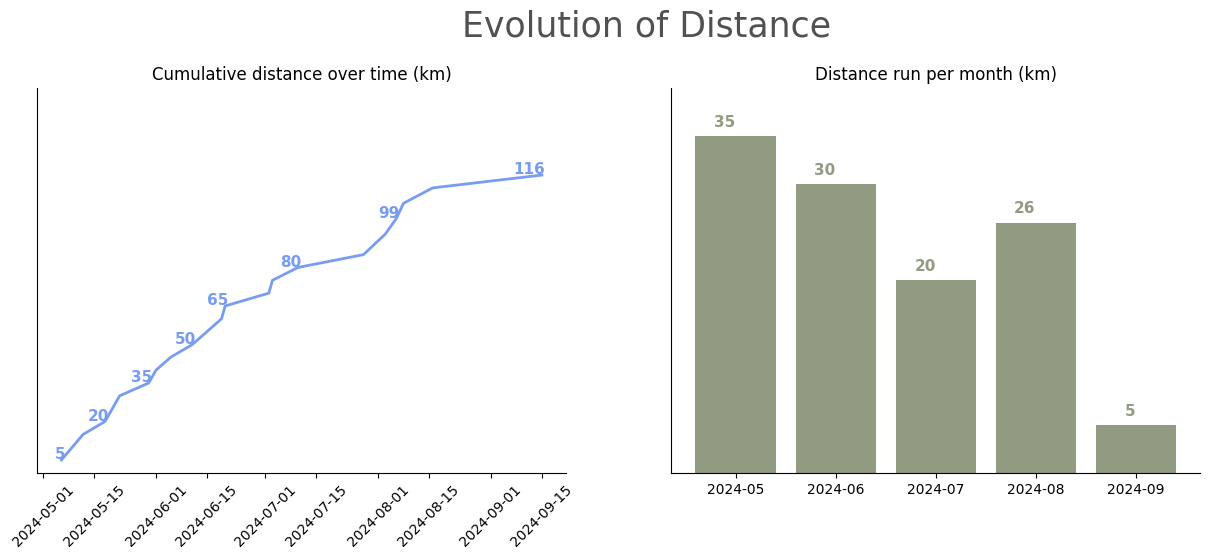

In [57]:
df_agg['month'] = df_agg['date'].apply(lambda x: str(x)[0:7])

df_agg_monthly = df_agg.groupby('month', as_index=False).agg({'km':'sum'})

fig, axs = plt.subplots(1, 2, figsize = (15, 5))


axs[0].plot(df_agg['date'], df_agg['cum_km'], color=BLUE, linewidth=2)
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_title('Cumulative distance over time (km)')
axs[0].set_ylim(0, 150)
axs[0].spines[['right', 'top']].set_visible(False)
axs[0].set_yticks([])
for i in range(0, len(df_agg), 3):
    axs[0].text(
        df_agg['date'][i]+pd.Timedelta(days=1), df_agg['cum_km'][i] + 0.5, f'{df_agg["cum_km"][i]:.0f}', fontsize=11, fontweight='bold', color=BLUE, ha='right'
    )


axs[1].bar(df_agg_monthly['month'], df_agg_monthly['km'], color=GREEN)
axs[1].set_title('Distance run per month (km)')
axs[1].set_ylim(0, 40)
axs[1].spines[['right', 'top']].set_visible(False)
axs[1].set_yticks([])
for i in range(0, len(df_agg_monthly)):
    axs[1].text(
        df_agg_monthly['month'][i], df_agg_monthly['km'][i] + 1, f'{df_agg_monthly["km"][i]:.0f}', fontsize=11, fontweight='bold', color=GREEN, ha='right'
    )

axs[0].text(df_agg['date'].min() + pd.Timedelta(days=110), 170, 'Evolution of Distance', fontsize=25, color=GRAY)

plt.show()

## Pace per km

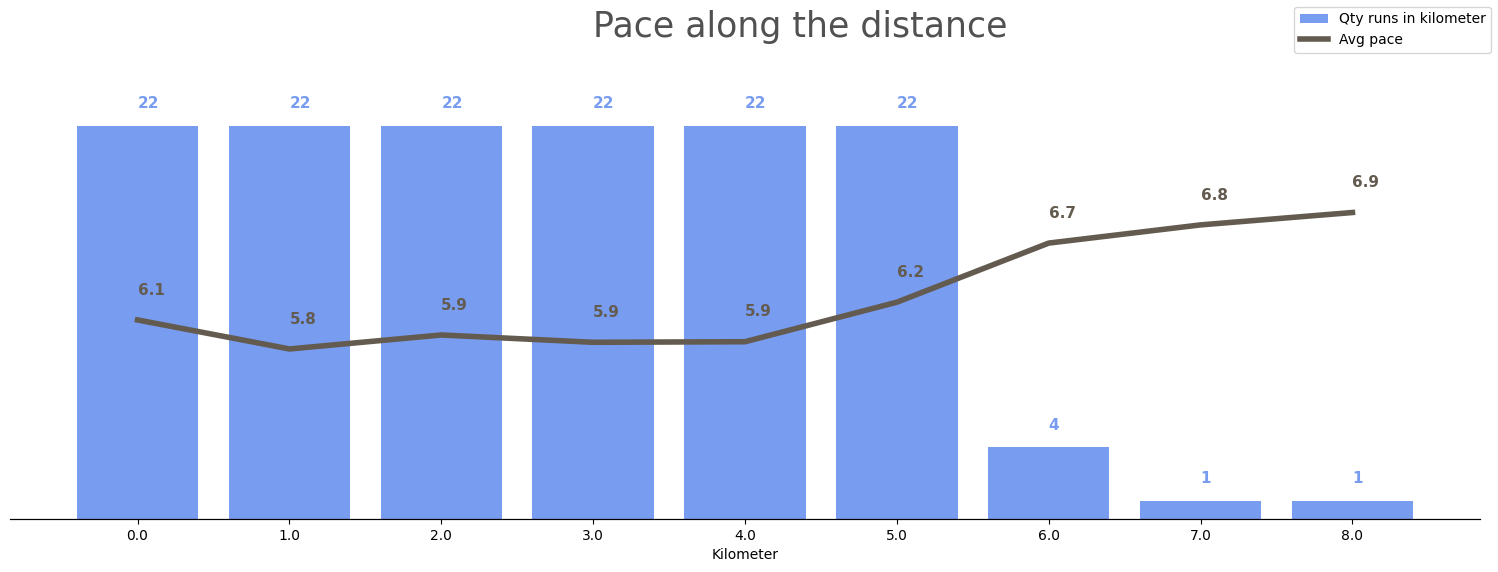

In [62]:
pace_per_km = df.groupby('km', as_index=False).agg({'pace':'mean', 'id':'nunique'})

fig, ax1 = plt.subplots(figsize=(15,5))

ax1.bar(pace_per_km['km'], pace_per_km['id'], color=BLUE, label='Qty runs in kilometer')
ax1.set_ylim(0, 25)
ax1.spines[['right', 'top', 'left']].set_visible(False)
ax1.set_yticks([])
ax1.set_xticks(range(len(pace_per_km['km'])))
ax1.set_xticklabels(pace_per_km['km'])
fig.tight_layout()

for i in range(0, len(pace_per_km)):
    ax1.text(
        pace_per_km['km'][i], pace_per_km['id'][i]+1, f"{pace_per_km['id'][i]:.0f}", fontsize=11, fontweight='bold', color=BLUE
    )


ax2 = ax1.twinx()
ax2.plot(pace_per_km['km'], pace_per_km['pace'], color=BROWN, label='Avg pace', linewidth=4)
ax2.set_ylim(4.5, 8)
ax2.spines[['right', 'top', 'left']].set_visible(False)
ax2.set_yticks([])
for i in range(0, len(pace_per_km)):
    ax2.text(
        pace_per_km['km'][i], pace_per_km['pace'][i]+0.2, f"{pace_per_km['pace'][i]:.1f}", fontsize=11, fontweight='bold', color=BROWN
    )

ax1.set_xlabel('Kilometer')
fig.legend()

ax1.text(pace_per_km['km'].mean()-1, pace_per_km['id'].max()+5, 'Pace along the distance', fontsize=25, color=GRAY)
plt.show()

## Part of the day

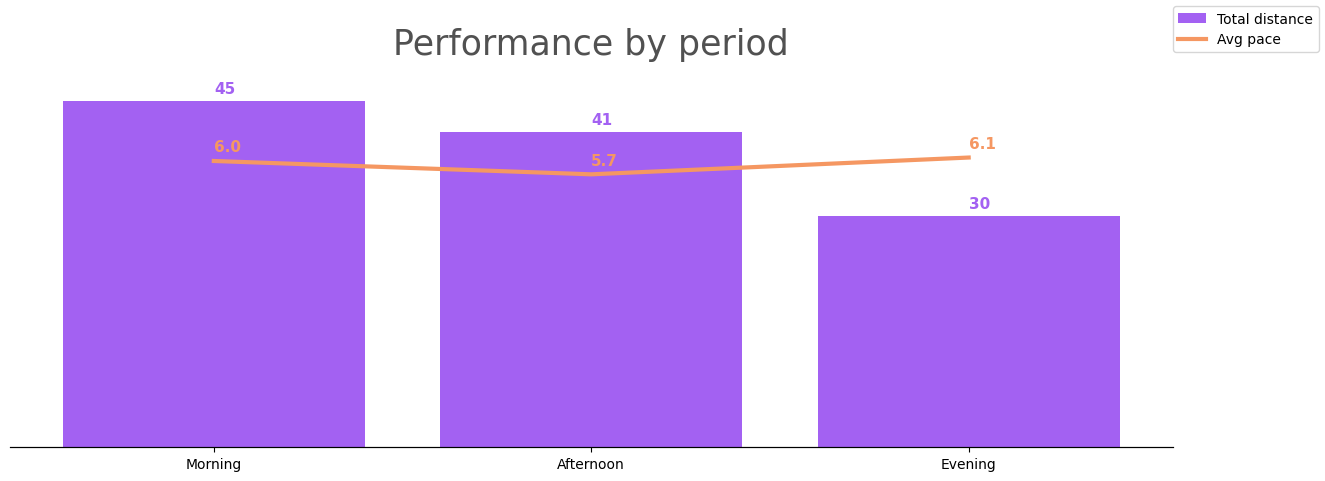

In [36]:
fig, ax1 = plt.subplots(figsize=(15, 5))

df_period_of_day = df_agg.groupby('period', as_index=False).agg({'km':'sum', 'pace':'mean'})
df_period_of_day.columns = ['period', 'total_distance', 'avg_pace']
period_dict = {'Morning':1, 'Afternoon':2, 'Evening':3}

df_period_of_day['order_period'] = df_period_of_day['period'].map(period_dict)
df_period_of_day = df_period_of_day.sort_values('order_period')

ax1.bar(df_period_of_day['period'], df_period_of_day['total_distance'], color=PURPLE, label='Total distance')
ax1.spines[['right', 'top', 'left']].set_visible(False)
ax1.set_yticks([])

for i in range(0, len(df_period_of_day)):
    ax1.text(
        df_period_of_day['period'][i], 
        df_period_of_day['total_distance'][i] + 1, 
        f"{df_period_of_day['total_distance'][i]:.0f}", 
        fontsize=11, fontweight='bold', color=PURPLE
    )

ax2 = ax1.twinx()
ax2.plot(df_period_of_day['period'], df_period_of_day['avg_pace'], color=ORANGE, linewidth=3, label='Avg pace')
ax2.spines[['right', 'top', 'left']].set_visible(False)
ax2.set_yticks([])

for i in range(0, len(df_period_of_day)):
    ax2.text(
        df_period_of_day['period'][i], 
        df_period_of_day['avg_pace'][i] + 0.2, 
        f"{df_period_of_day['avg_pace'][i]:.1f}", 
        fontsize=11, fontweight='bold', color=ORANGE
    )

ax1.set_ylim(0, df_period_of_day['total_distance'].max() + 5)
ax2.set_ylim(0, df_period_of_day['avg_pace'].max() + 2)

ax1.set_title('Performance by period', fontsize=25, color=GRAY)

fig.legend()

plt.show()

## Day of the Run

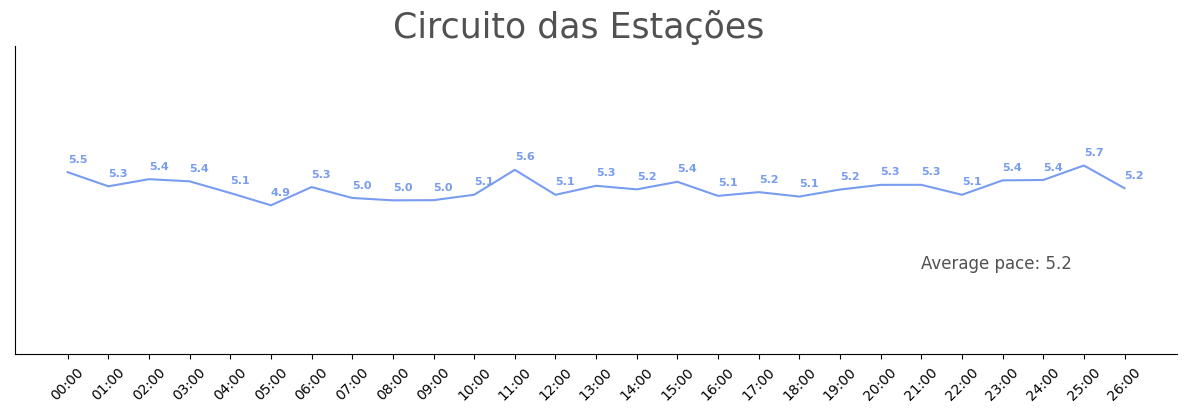

In [37]:
df_run = df[df['date'] == '2024-07-28']

fig, ax = plt.subplots(figsize = (15, 4))

ax.plot(df_run['time'], df_run['pace'], color=BLUE)
ax.set_ylim(2,8)
ax.tick_params(axis='x', rotation=45)
ax.spines[['right', 'top']].set_visible(False)
ax.set_yticks([])

for i in range(0, len(df_run), 1):
    ax.text(
        df_run['time'][i], df_run['pace'][i]+0.2, f"{df_run['pace'][i]:.1f}", fontsize=8, fontweight='bold', color=BLUE
    )

ax.text('08:00', df_run['pace'].max()+2.5, 'Circuito das Estações', fontsize=25, color=GRAY)

ax.text('21:00', df_run['pace'].max()-2, F"Average pace: {df_run['pace'].mean():.1f}", fontsize=12, color=GRAY);

# Statistics

## Shape of the curve

In [38]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

import scipy.stats as stats

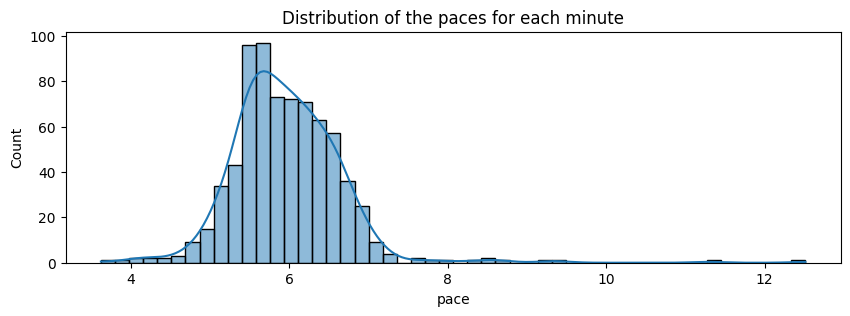

In [64]:
fig, ax = plt.subplots(figsize=(10,3))

sns.histplot(df['pace'], kde=True, ax=ax)
ax.set_title('Distribution of the paces for each minute')
plt.show()

In [40]:
mu = df["pace"].mean()
median = df["pace"].median()
sigma = df["pace"].std()
skew = df["pace"].skew()
kurtosis = df["pace"].kurtosis()

print(f"Mean: {mu:.2f}")
print(f"Median: {median:.2f}")
print(f"Std: {sigma:.2f}")
print(f"Skewness: {skew:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Mean: 5.96
Median: 5.90
Std: 0.71
Skewness: 2.12
Kurtosis: 15.81


In [41]:
stat, p_value = stats.shapiro(df["pace"])

print(f"p-value: {p_value}")

p-value: 8.27513827399393e-24


## Statistical Tests

### Period

In [42]:
shapiro_results = {}
for period in df['period'].unique():
    group_data = df[df['period'] == period]['pace']
    stat, p_value = stats.shapiro(group_data)
    shapiro_results[period] = (stat, p_value)

for period, (stat, p_value) in shapiro_results.items():
    print(f"Period: {period}, p-value: {p_value}")

Period: Afternoon, p-value: 8.221875849395351e-18
Period: Evening, p-value: 5.054289602274998e-17
Period: Morning, p-value: 0.00025987226399593055


In [43]:
groups = [df[df['period'] == period]['pace'] for period in df['period'].unique()]

kruskal_stat, kruskal_p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis p-value: {kruskal_p_value}")

Kruskal-Wallis p-value: 6.169632135130609e-13


### Kilometer mark

In [44]:
shapiro_results = {}

df_km = df.query("km < 7")

for km in df_km['km'].unique():
    group_data = df_km[df_km['km'] == km]['pace']
    stat, p_value = stats.shapiro(group_data)
    shapiro_results[km] = (stat, p_value)

for km, (stat, p_value) in shapiro_results.items():
    print(f"Km: {km}, p-value: {p_value}")

Km: 0.0, p-value: 1.7559486393273422e-15
Km: 1.0, p-value: 0.31246888637542725
Km: 2.0, p-value: 0.9952252507209778
Km: 3.0, p-value: 0.7022765874862671
Km: 4.0, p-value: 8.0265206634067e-05
Km: 5.0, p-value: 0.005524144973605871
Km: 6.0, p-value: 0.45292484760284424


In [45]:
groups = [df_km[df_km['km'] == km]['pace'] for km in df_km['km'].unique()]

kruskal_stat, kruskal_p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis p-value: {kruskal_p_value}")

Kruskal-Wallis p-value: 0.00025004028129606845
